In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

def time_parser(t):
  return pd.to_datetime(t, unit='s')


def metrics_plot(file_path, sep=',', metrics=[], start=None, end=None, ds_window=300):
  df = pd.read_csv(file_path, sep=sep, header=0, index_col=0)
  df.index = pd.to_datetime(df.index, unit='s')

  region = ""
  metric_type = ""
  if "west" in file_path:
      region = "west"
  elif "east" in file_path:
      region = "east"
        
  if "update" in file_path:
      metric_type = "update"
  elif "create" in file_path:
      metric_type = "create"
    
  df["region"] = pd.Series([region]*len(df.index),index = df.index)
  df["metric_type"] = pd.Series([metric_type]*len(df.index), index = df.index)
  return df
    
frames = [metrics_plot(f) for f in glob.glob("/Users/sean.cavanagh/delete-me/stale-alarms/cpa/*tartarus*.csv")]

metrics = pd.concat(frames)


In [143]:
counts = metrics["2017-04-10":"2017-05-10"]
counts = counts[counts.metric_type == "create"]
west_counts = counts[counts.region == "west"]["count"]
east_counts = counts[counts.region == "east"]["count"]

In [144]:
east_counts

t
2017-04-10 00:03:48    295664
2017-04-10 00:08:48    295704
2017-04-10 00:13:48    295792
2017-04-10 00:18:48    295848
2017-04-10 00:23:48    295900
2017-04-10 00:28:48    295972
2017-04-10 00:33:48    296056
2017-04-10 00:38:48    296168
2017-04-10 00:43:48    296228
2017-04-10 00:48:48    296272
2017-04-10 00:53:48    296360
2017-04-10 00:58:48    296424
2017-04-10 01:03:48    296480
2017-04-10 01:08:48    296564
2017-04-10 01:13:48    296648
2017-04-10 01:18:48    296696
2017-04-10 01:23:48    296740
2017-04-10 01:28:48    296872
2017-04-10 01:33:48    296984
2017-04-10 01:38:48    297076
2017-04-10 01:43:48    297148
2017-04-10 01:48:48    297236
2017-04-10 01:53:48    297296
2017-04-10 01:58:48    297408
2017-04-10 02:03:48    297492
2017-04-10 02:08:48    297600
2017-04-10 02:13:48    297684
2017-04-10 02:18:48    297768
2017-04-10 02:23:48    298016
2017-04-10 02:28:48    298116
                        ...  
2017-05-10 21:30:34    210328
2017-05-10 21:35:34    210452
2017-05-

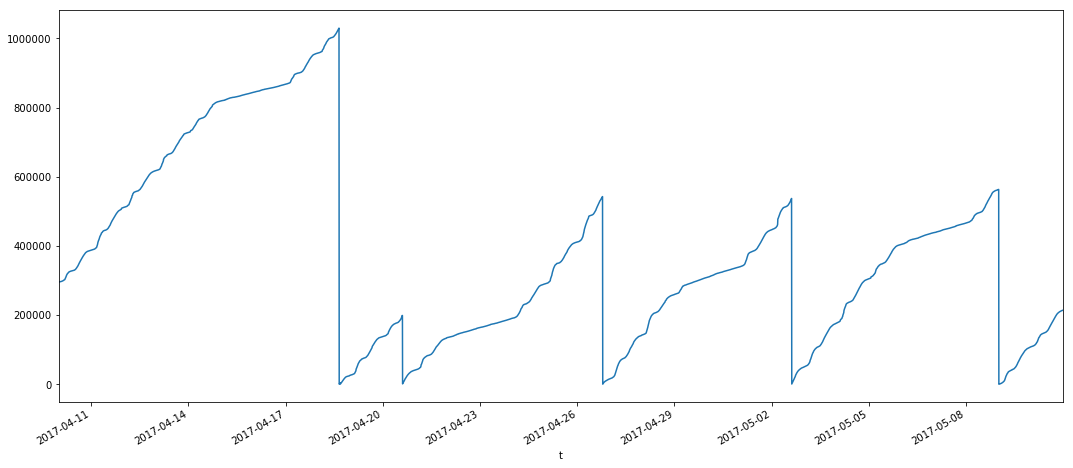

In [145]:
east_counts.plot(figsize=(18,8))

In [146]:
def sum_metric(series):
  peaks = []
  init = series[0]
  i = 0
  for c in series:
    if c < init:
      peaks.append(init)
      print "%s %s %s"%(i, init, c)
    init = c
    i += 1
  print peaks
  total = sum(peaks) - series[0]
  return total

In [147]:
total = sum_metric(west_counts) + sum_metric(east_counts)
total

2478 1335180 468
2501 11428 688
4832 880112 660
6511 612934 476
8351 638150 264
[1335180, 11428, 880112, 612934, 638150]
2491 1029536 523
2500 4595 548
3053 198964 1252
4831 542644 474
6510 537186 808
8350 563298 272
[1029536, 4595, 198964, 542644, 537186, 563298]


5560611

In [133]:
east_counts[13330:13340]

Series([], Name: count, dtype: int64)

In [139]:
duration = counts.index[-1] - counts.index[0]
days = duration.days + (duration.seconds > (12 * 3600) and 1 or 0)
days

38

In [140]:
alarms_per_day = total / float(days)
alarms_per_day

161274.55263157896

In [141]:
(total - 24530.0) / total

0.99599734548782703

In [142]:
((counts["m5_rate"].sum()) * 300) / days

189973.49960526248

In [138]:
sum_metric(counts[counts.metric_type == "create"]["count"])

2491 1029536 523
2500 4595 548
3053 198964 1252
4831 542644 474
6510 537186 808
8350 563298 272
10367 567682 140
10368 140 120
13324 1335180 468
13347 11428 688
15678 880112 660
17357 612934 476
19197 638150 264
[1029536, 4595, 198964, 542644, 537186, 563298, 567682, 140, 1335180, 11428, 880112, 612934, 638150]


6626185